In [584]:
class Node:
    def __init__(self, name,workOffset=0):
        self.name = name
        self.parent = []
        self.children = []
        self.visited = False
        self.workTime = ord(name)-64 + workOffset
        self.worked = 0


    
    def __repr__(self) -> str:
        return self.name

    def add_parent(self, parent):
        self.parent.append(parent) 

    def add_children(self, child):
        self.children.append(child) 

    def visit(self):
        self.worked +=1
        if self.workTime == self.worked:
            self.visited = True

In [585]:
import regex as re
with open('input/7') as f:
    dat = re.findall('Step (\w{1}).*step (\w{1})',f.read())

# print(dat)

In [586]:
nodes = dict()

for l in dat:
    if l[0] not in nodes.keys():
        nodes[l[0]] = Node(l[0])
    if l[1] not in nodes.keys():
        nodes[l[1]] = Node(l[1])
    nodes[l[1]].add_parent(nodes[l[0]])
    nodes[l[0]].add_children(nodes[l[1]])

print(nodes)

{'T': T, 'P': P, 'Q': Q, 'W': W, 'N': N, 'A': A, 'Z': Z, 'E': E, 'L': L, 'M': M, 'R': R, 'S': S, 'F': F, 'V': V, 'C': C, 'H': H, 'J': J, 'I': I, 'B': B, 'O': O, 'D': D, 'K': K, 'G': G, 'X': X, 'Y': Y, 'U': U}


In [587]:
available = []

for c in nodes.values():
    if(all([i.visited for i in c.parent])):
        available.append(c)
currentNode = nodes[sorted([n.name for n in available])[0]]
available.remove(currentNode)

print(currentNode)
outlist = currentNode.name
for k in range(len(nodes)-1): 
    print(f'current node: {currentNode}')
    currentNode.visit()
    print(f'available: {available}')
    for c in currentNode.children:
        if c not in available:
            available.append(c)
    print(f'extended available: {available}')
    alph = sorted([n.name for n in available])
    for c in alph:
        print(f'checking: {c}')
        print([i.name for i in nodes[c].parent])
        if(all([i.visited for i in nodes[c].parent])):
            outlist = outlist + c
            print(f'GOOD! outlist: {outlist}')
            print(available)
            available.remove(nodes[c])
            currentNode = nodes[c]
            print(f'next node: {currentNode}')
            break
    print('None found!')





L
current node: L
available: [T, N, R]
extended available: [T, N, R, M, F]
checking: F
['L']
checking: M
['L']
checking: N
[]
GOOD! outlist: LN
[T, N, R, M, F]
next node: N
None found!
current node: N
available: [T, R, M, F]
extended available: [T, R, M, F, A, Z, J, U, E, C, I]
checking: A
['N', 'J', 'F', 'I']
checking: C
['T', 'Q', 'N', 'Z']
checking: E
['Z', 'K', 'Y', 'N', 'P']
checking: F
['L']
checking: I
['J', 'V', 'N', 'Z']
checking: J
['N']
checking: M
['L']
checking: R
[]
GOOD! outlist: LNR
[T, R, M, F, A, Z, J, U, E, C, I]
next node: R
None found!
current node: R
available: [T, M, F, A, Z, J, U, E, C, I]
extended available: [T, M, F, A, Z, J, U, E, C, I, S, K, D, V, B, W, O]
checking: A
['N', 'J', 'F', 'I']
checking: B
['A', 'I', 'R', 'F']
checking: C
['T', 'Q', 'N', 'Z']
checking: D
['H', 'U', 'G', 'R', 'K', 'E', 'P', 'W', 'M']
checking: E
['Z', 'K', 'Y', 'N', 'P']
checking: F
['L']
checking: I
['J', 'V', 'N', 'Z']
checking: J
['N']
checking: K
['I', 'R', 'A', 'C']
checking: 

In [588]:
print(f'Problem 1: {outlist}')

Problem 1: LNRTQ


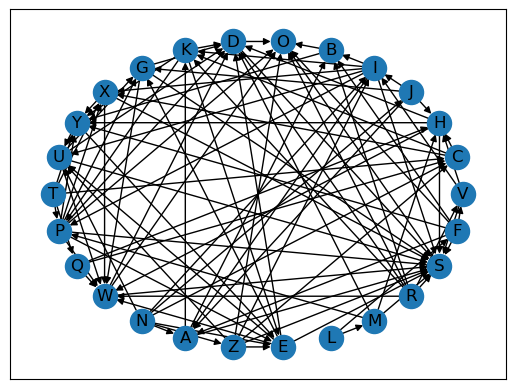

In [589]:
import networkx as nx


G = nx.DiGraph()

for d in dat:
    G.add_edge(d[0],d[1])

import matplotlib.pyplot as plt

nx.draw_networkx(G, pos=nx.shell_layout(G))

plt.show()

In [590]:
#Problem 2

nodes = dict()
workOffset = 60
nElves = 5

for l in dat:
    if l[0] not in nodes.keys():
        nodes[l[0]] = Node(l[0],workOffset)
    if l[1] not in nodes.keys():
        nodes[l[1]] = Node(l[1],workOffset)
    nodes[l[1]].add_parent(nodes[l[0]])
    nodes[l[0]].add_children(nodes[l[1]])

print(nodes)

{'T': T, 'P': P, 'Q': Q, 'W': W, 'N': N, 'A': A, 'Z': Z, 'E': E, 'L': L, 'M': M, 'R': R, 'S': S, 'F': F, 'V': V, 'C': C, 'H': H, 'J': J, 'I': I, 'B': B, 'O': O, 'D': D, 'K': K, 'G': G, 'X': X, 'Y': Y, 'U': U}


In [591]:
available = []
elves = [None for i in range(nElves)]
isDone = False

for c in nodes.values():
    if(all([i.visited for i in c.parent])):
        available.append(c)
        for i in range(nElves):
            if elves[i] is None:
                elves[i] = c
                break
# print(available)

t = -1
while not isDone:
    t +=1
    # print(f'time: {t}\telves: {elves}\t{[n.visited for n in nodes.values()]}')
    # print(f'')
    #Update all current elves, if current item got completed, elf is None
    for idx, e in enumerate(elves):
        if(e):
            e.visit()
            if e.visited: #if it just got completed, check children and append to available
                elves[idx] = None
                # print(f'{e} got finished!')
                # print(f'Children: {e.children}')
                # print(f'current available: {available}')
                if e in available:
                    available.remove(e)
                for c in e.children:
                    if c not in available:
                        available.append(c)
                # print(f'new available: {available}')
# 
                alph = sorted([n.name for n in available])
                for c in alph:
                    # print(f'checking: {c}')
                    # print(f'parents: {[i.name for i in nodes[c].parent]}')
                    if(all([i.visited for i in nodes[c].parent]) and nodes[c].worked ==0):
                        # print(f'Assigning {c} if available!')
                        for idxNew, eNew in enumerate(elves):
                            if eNew is None:
                                elves[idxNew] = nodes[c]
                                # print(f'Assigning {c} to elf {idxNew}')
                                if c in available:
                                    available.remove(c)
                                break
    
    isDone = all([n.visited for n in nodes.values()])
                        
                

    
    


# currentNode = nodes[sorted([n.name for n in available])[0]]
# available.remove(currentNode)


In [592]:
print(t+1)


1180
